In [1]:
import fft_code as code
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from IPython.display import Audio

In [2]:
from scipy.stats import binned_statistic as bin_stat

In [84]:
min_f = 100
step = 1
max_f = 1000 + 2*step
edges = np.arange(min_f, max_f, step)

fft was complete


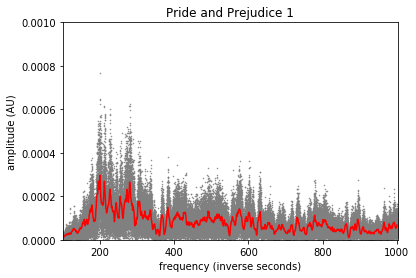

fft was complete


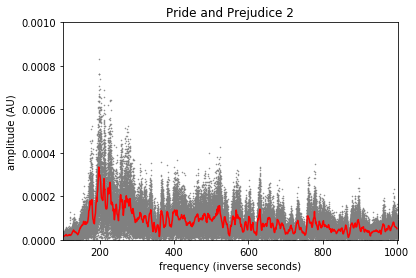

fft was complete


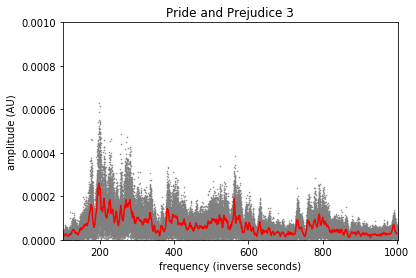

fft was complete


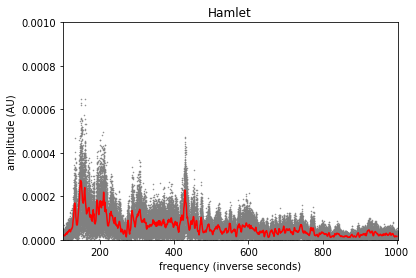

fft was complete


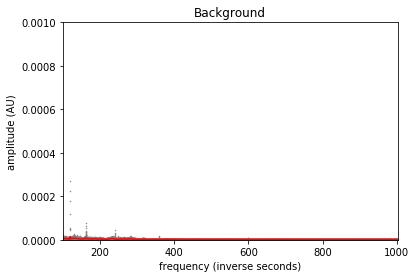

In [89]:
PPs = ["PP_1.wav", "PP_2.wav", "PP_3.wav", "hamlet.wav", "blank_test.wav"] #recordings of the same passage of pride and prejudice
titles = ["Pride and Prejudice 1", "Pride and Prejudice 2", "Pride and Prejudice 3", "Hamlet", "Background"]
n = 2160000 #length for this sample length
ffts = np.zeros((len(PPs), n))
weights = np.zeros((len(PPs), len(edges) - 1))

for i in np.arange(len(PPs)):
    fft_i, fs, samplerate = code.fft_wrapper(PPs[i], pass_title = titles[i], f_max_plot = 400)
    plt.xlim((min_f, max_f))
    ffts[i, :] = fft_i
    in_range = (fs > min_f) & (fs < max_f)
    stat, bin_edges, _ = bin_stat(fs[in_range], ffts[i, in_range], bins = edges)
    weights[i, :] = stat
    plt.plot(bin_edges[:-1], stat, 'r')
    plt.show()

bins = bin_edges

In [86]:
#Normalize
summed_sqs = np.tile(np.sum(weights**2, 1), (len(weights.T), 1)).T
normed = weights/np.sqrt(summed_sqs)

In [87]:
n_files = 4
dots = np.zeros((n_files, n_files))

for i in np.arange(n_files):
    for j in np.arange(n_files):
        dots[i, j] = np.sum(normed[i, :]*normed[j, :])

print(dots)

[[1.         0.97934877 0.97215187 0.82876037]
 [0.97934877 1.         0.97096042 0.81935814]
 [0.97215187 0.97096042 1.         0.81680698]
 [0.82876037 0.81935814 0.81680698 1.        ]]
